In [78]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import datascience as ds
np.random.seed(42)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('fivethirtyeight')

In [172]:
pmdata = pd.read_csv('NYC_Pilot2_PM_Part1.csv') #contents of data
pmdata.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,0,0,0,23.7,57.8,5.154881
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,0,0,0,23.6,57.6,4.508813
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,0,0,0,23.6,57.5,5.539503


In [173]:
geojsonfile=pm = "https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson"
# Create a GeoDataFrame from the DataFrame by converting lat/lon to geometry
gdf = gpd.read_file(geojsonfile)
gdf.head()

,neighborhood,boroughCode,borough,@id,geometry
0,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.84860 40.87167, -73.84582 40.870..."
1,Alley Pond Park,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.74333 40.73888, -73.74371 40.739..."
2,Arden Heights,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.16983 40.56108, -74.16982 40.561..."
3,Arlington,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.15975 40.64142, -74.15998 40.641..."
4,Arrochar,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.06078 40.59319, -74.06079 40.593..."


In [182]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas.tools import sjoin

# Create a GeoDataFrame from the DataFrame by converting lat/lon to geometry
geometry = [Point(xy) for xy in zip(pmdata['longitude'], pmdata['latitude'])]
gdf_pm25 = gpd.GeoDataFrame(pmdata, geometry=geometry, crs="EPSG:4326")

# Perform spatial join
gdf_pm25_result = sjoin(gdf_pm25, gdf, how="inner", predicate="within")

# Convert the resulting GeoDataFrame to DataFrame
df_result = pd.DataFrame(gdf_pm25_result)
# Select desired columns
df_final = df_result[['neighborhood','pm25', 'latitude','longitude']]

# Display the resulting DataFrame
df_result.head()
#df_final.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,temperature,humidity,pm25,label,geometry,index_right,neighborhood,boroughCode,borough,@id
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,23.7,57.3,4.508813,4,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,23.7,57.8,5.462420,4,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,23.7,57.8,5.154881,4,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,23.6,57.6,4.508813,4,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,23.6,57.5,5.539503,4,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...


In [23]:
df_final.dtypes

pm25            float64
latitude        float64
longitude       float64
neighborhood     object
dtype: object

In [52]:
df_final.shape

(169995, 5)

In [24]:
tbl=ds.tables.Table.from_df(df_final)
tbl

pm25,latitude,longitude,neighborhood
4.50881,40.8477,-73.8693,Bronx Park
5.46242,40.8477,-73.8693,Bronx Park
5.15488,40.8476,-73.8694,Bronx Park
4.50881,40.8476,-73.8694,Bronx Park
5.5395,40.8476,-73.8694,Bronx Park
5.1652,40.8476,-73.8694,Bronx Park
5.1652,40.8476,-73.8694,Bronx Park
5.38372,40.8476,-73.8694,Bronx Park
4.50881,40.8476,-73.8694,Bronx Park
5.5395,40.8476,-73.8694,Bronx Park


In [25]:
max_pm25 = tbl.column("pm25").max()
print("Maximum pm25 value:", max_pm25)

min_pm25 = tbl.column("pm25").min()
print("Minimum pm25 value:", min_pm25)

Maximum pm25 value: 12.74441924
Minimum pm25 value: 1.568473024


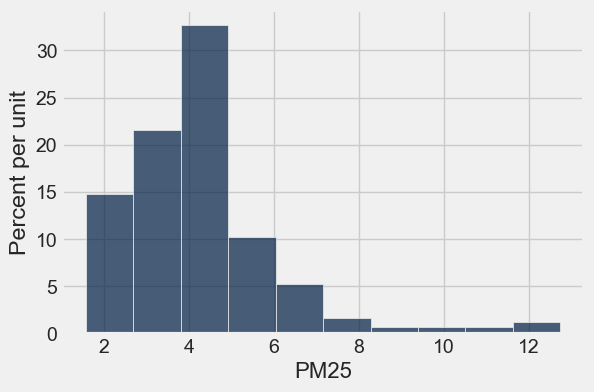

In [79]:
# Create a Table with a column of PM10 values
table_selected = ds.tables.Table().with_column('PM25', df_final['pm25'])

# Draw histogram of PM10 values with specified bins
table_selected.hist(bins=10)
plt.xlabel("PM25")
plt.ylabel("Percent per unit")
plt.show()

## Extract and normalize several features

In [183]:
feature_columns = ["pm25", "latitude", "longitude"]
features = df_final[feature_columns].copy()
features

,pm25,latitude,longitude
0,4.508813,40.847672,-73.869316
1,5.462420,40.847668,-73.869316
2,5.154881,40.847649,-73.869362
3,4.508813,40.847649,-73.869362
4,5.539503,40.847649,-73.869362
...,...,...,...
161398,3.421613,40.829147,-73.931694
161454,2.292276,40.858864,-73.922646
161455,2.367734,40.854622,-73.923546
161459,3.464629,40.839794,-73.848595


In [184]:
from sklearn.preprocessing import StandardScaler
# Scale these features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
 
scaled_features

array([[ 0.11028574,  1.24714792,  1.20047221],
       [ 0.64163002,  1.24691558,  1.20047221],
       [ 0.47027084,  1.24581192,  1.19809614],
       ..., 
       [-1.08271096,  1.65085416, -1.60070531],
       [-0.47152754,  0.78953674,  2.27078753],
       [-0.55775356,  3.72973799,  2.27987857]])

In [185]:
print(scaled_features.shape)
print(features.shape)

(169995, 3)
(169995, 3)


## K-Means with scikit-learn

In [188]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
# Perform the fit
kmeans.fit(scaled_features)

#pmdata.loc[:, 'label'] = kmeans.labels_
df_final.loc[:, 'label'] = kmeans.labels_

sample= df_final.groupby('neighborhood', group_keys=False).apply(lambda x: x.sample(frac=0.1))

print('sample size:',sample.shape)


sample size: (17000, 5)


C:\Users\Manar Anwer\AppData\Local\Temp\ipykernel_5924\3791234828.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, 'label'] = kmeans.labels_


In [200]:
import altair as alt
alt.data_transformers.disable_max_rows()

alt.Chart(sample).mark_circle().encode(
    alt.X('latitude:Q', scale=alt.Scale(zero=False)),
    alt.Y('longitude:Q', scale=alt.Scale(zero=False)),
    size='pm25:Q',
    color=alt.Color('label:N', scale=alt.Scale(scheme='dark2')),
    tooltip=list(sample.columns)
).interactive()


alt.Chart(...)

In [104]:
sample.groupby('label', as_index=False).size()

,label,size
0,0,1294
1,1,5157
2,2,2360
3,3,5003
4,4,3186


In [110]:
pm25_label_subset = sample[['pm25', 'label']]

sample_tbl=ds.tables.Table.from_df(pm25_label_subset)
sample_groups_mean = sample_tbl.groups('label', np.mean)
sample_groups_mean

label,pm25 mean
0,9.01177
1,3.80525
2,2.83816
3,4.02557
4,4.85527


##  Ploting a choropleth, coloring neighborhoods by their cluster label

In [189]:
gdf.head()

,neighborhood,boroughCode,borough,@id,geometry
0,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.84860 40.87167, -73.84582 40.870..."
1,Alley Pond Park,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.74333 40.73888, -73.74371 40.739..."
2,Arden Heights,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.16983 40.56108, -74.16982 40.561..."
3,Arlington,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.15975 40.64142, -74.15998 40.641..."
4,Arrochar,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.06078 40.59319, -74.06079 40.593..."


In [190]:
df_final.head()

,neighborhood,pm25,latitude,longitude,label
0,Bronx Park,4.508813,40.847672,-73.869316,1
1,Bronx Park,5.462420,40.847668,-73.869316,1
2,Bronx Park,5.154881,40.847649,-73.869362,1
3,Bronx Park,4.508813,40.847649,-73.869362,1
4,Bronx Park,5.539503,40.847649,-73.869362,1


In [191]:
df_final.groupby('label', as_index=False).size()

,label,size
0,0,51490
1,1,31879
2,2,23691
3,3,50763
4,4,12172


In [193]:
# do the merge
gdf_pm25_result2 = gdf.merge(df_final, left_on='neighborhood', right_on='neighborhood', how='left')

# assign -1 to the neighborhoods without any listings
gdf_pm25_result2['label'] = gdf_pm25_result2['label'].fillna(-1)
gdf_pm25_result2

,neighborhood,boroughCode,borough,@id,geometry,pm25,latitude,longitude,label
0,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.84860 40.87167, -73.84582 40.870...",2.625572,40.857227,-73.868797,2.0
1,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.84860 40.87167, -73.84582 40.870...",2.625572,40.857635,-73.868484,2.0
2,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.84860 40.87167, -73.84582 40.870...",2.625572,40.858036,-73.868156,2.0
3,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.84860 40.87167, -73.84582 40.870...",2.674112,40.858280,-73.867958,2.0
4,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.84860 40.87167, -73.84582 40.870...",3.274350,40.858326,-73.867920,2.0
...,...,...,...,...,...,...,...,...,...
170358,Windsor Terrace,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.98006 40.66075, -73.97988 40.660...",NaN,NaN,NaN,-1.0
170359,Woodhaven,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.86233 40.69596, -73.85654 40.697...",NaN,NaN,NaN,-1.0
170360,Woodlawn,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.85947 40.90052, -73.85926 40.900...",NaN,NaN,NaN,-1.0
170361,Woodrow,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.17728 40.54063, -74.17723 40.539...",NaN,NaN,NaN,-1.0


In [196]:
gdf_pm25_result2.groupby('label', as_index=False).size()

,label,size
0,-1.0,260
1,0.0,51490
2,1.0,31969
3,2.0,23709
4,3.0,50763
5,4.0,12172


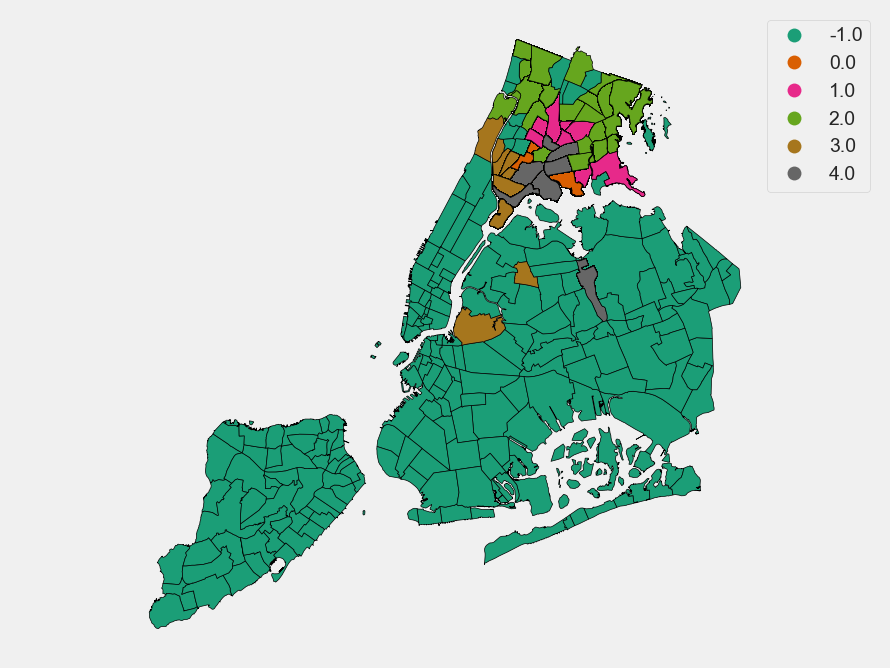

In [197]:
# plot the data
gdf_pm25_result2 = gdf_pm25_result2.to_crs(epsg=3857)

# setup the figure
f, ax = plt.subplots(figsize=(10, 8))

# plot, coloring by label column
# specify categorical data and add legend
gdf_pm25_result2.plot(
    column="label",
    cmap="Dark2",
    categorical=True,
    legend=True,
    edgecolor="k",
    lw=0.5,
    ax=ax,
)


ax.set_axis_off()
plt.axis("equal");

## Visualize the  clusters

In [139]:
# Setup figure and axis
# Extract the number of clusters 
num_clusters = df_result['label'].nunique() - 1
print(num_clusters)

# Get cluster sizes, from largest to smallest
N = df_result.groupby('label').size().sort_values(ascending=False)
print(N)

# Extract labels (ignoring label -1 for noise)
top5 = list(N.iloc[1:6].index)
print(top5)

4
label
2    54937
3    45648
4    45270
1    18137
0     6003
dtype: int64
[3, 4, 1, 0]


In [140]:
# get the features for the top 5 labels
selection = df_result['label'].isin(top5)

# select top 5 and groupby by the label
grps = df_result.loc[selection].groupby('label')

# calculate average pickup hour and trip distance per cluster
avg_values = grps['pm25'].mean()
avg_values.loc[top5]

label
3     3.565690
4     3.777241
1     6.369994
0    10.853070
Name: pm25, dtype: float64

Plotting cluster #3...
Plotting cluster #4...
Plotting cluster #1...
Plotting cluster #0...


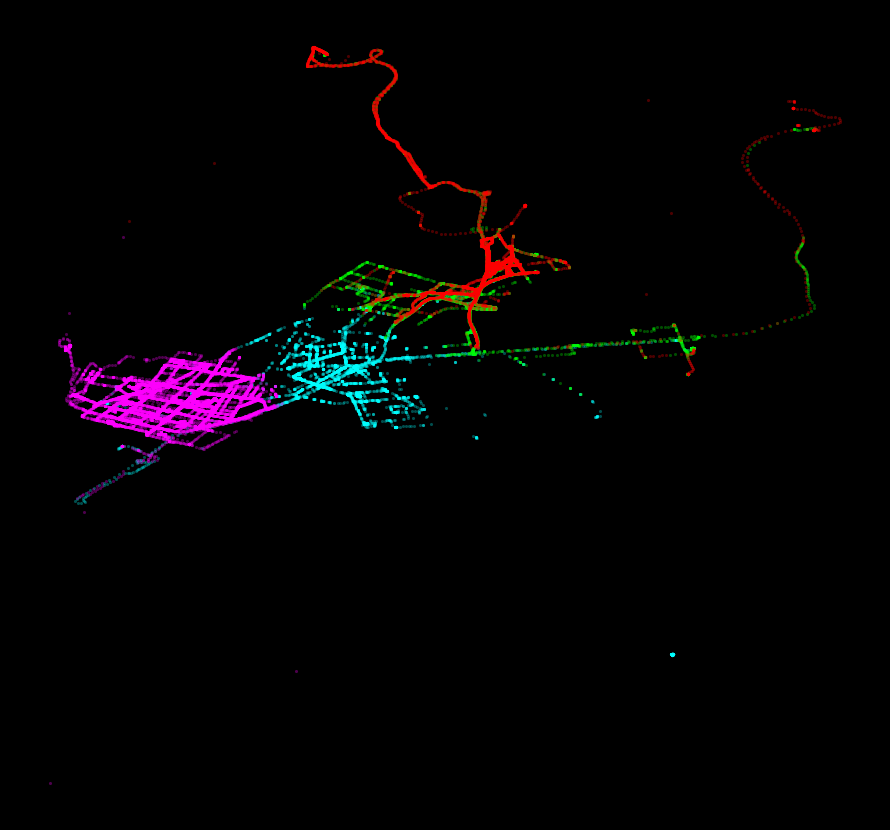

In [199]:
# Setup figure and axis
f, ax = plt.subplots(figsize=(10, 10), facecolor="black")

# specify colors for each of the top 5 clusters
colors = ["aqua", "lime", "red", "fuchsia", "yellow"]

# loop over top 5 largest clusters
for i, label_num in enumerate(top5):
    print(f"Plotting cluster #{label_num}...")

    # select all the samples with label equals "label_num"
    this_cluster = df_final.loc[df_result["label"] == label_num]

    # plot pickups
    ax.scatter(
        this_cluster["longitude"],
        this_cluster["latitude"],
        linewidth=0,
        color=colors[i],
        s=5,
        alpha=0.3,
    )

# Display the figure
ax.set_axis_off()